Import libraries

In [ ]:
#importing library
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os


Data preprocessing

>Training Image preprocessing

In [ ]:
# Data preprocessing
def preprocess_data(dataset):
    # Normalize the data
    def process_image(image, label):
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    dataset = dataset.map(process_image)
    return dataset

In [ ]:
#keras.utils.image_dataset_from_directory is a class used to load images in the python file using keras which comes under tensorflow
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",  #this means : whatever is the name of the directory , select it as my label
    label_mode="categorical",   #"categorical" means that the labels are encoded as a categorical vector
    class_names=None,   #Only valid if labels is "inferred". This is the explicit list of class names (must match names of subdirectories). Used to control the order of the classes
    color_mode="rgb",   #Whether the images will be converted to have 1, 3, or 4 channels. Defaults to "rgb". others are greyscale,ckms,rgba etc
    batch_size=32,      #Size of the batches of data. Defaults to 32. If None, the data will not be batched (the dataset will yield individual samples).
    image_size=(128, 128),  #Size to resize images to after they are read from disk, specified as (height, width). Defaults to (256, 256).
    shuffle=True,   #Whether to shuffle the data. Defaults to True. If set to False, sorts the data in alphanumeric order or sequence
    seed=42,
    interpolation="bilinear"  #String, the interpolation method used when resizing images. Supports "bilinear", "nearest", "bicubic", "area", "lanczos3", "lanczos5", "gaussian", "mitchellcubic". Defaults to "bilinear".
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred", #this means : whatever is the name of the directory , select it as my label
    label_mode="categorical",   #"categorical" means that the labels are encoded as a categorical vector
    class_names=None,   #Only valid if labels is "inferred". This is the explicit list of class names (must match names of subdirectories). Used to control the order of the classes
    color_mode="rgb",   #Whether the images will be converted to have 1, 3, or 4 channels. Defaults to "rgb". others are greyscale,ckms,rgba etc
    batch_size=32,      #Size of the batches of data. Defaults to 32. If None, the data will not be batched (the dataset will yield individual samples).
    image_size=(128, 128),
    shuffle=True,
    seed=42,
    interpolation="bilinear",
    subset = None,

)

Found 17572 files belonging to 38 classes.


In [ ]:
# Preprocess the datasets
training_set = preprocess_data(training_set)
validation_set = preprocess_data(validation_set)

In [ ]:
training_set #here 3 in shape represents the RGB image and 128x128 is img size
#here TensorSpec(shape=(None, 128,128,3)....) is x variable and TensorSpec(shape=(None,38),....) is Y variable

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
validation_set #here 3 in shape represents the RGB image and 128x128 is img size
#here TensorSpec(shape=(None, 128,128,3)....) is x variable and TensorSpec(shape=(None,38),....) is Y variable

<_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
#importing few more libraries
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.models import Sequential

In [ ]:
cnn = tf.keras.models.Sequential() #sequential format data (model) training

In [ ]:
#layer 1
cnn.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3])) #this line show how input will be taken
#kernel size = shows the data or feature extraction will done on which type of matrix (if 3 then it will be 3x3 matrix).
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu')) #layer 2 (does not need any i/p size hence we remove it rest is same)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))       #layer 3 : max pooling layer
#max pooling : each pooling operation selects the maximum value of the current view. where strides shows the moment of sliding window (if its is 2 then it means it is 2x2 matrix form)

c:\Users\ALOK\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting
#this also helps to prevent have more noises from the images

In [ ]:
cnn.add(tf.keras.layers.Flatten())
#Flattens the input. Does not affect the batch size.
#If inputs are shaped (batch,) without a feature axis, then flattening adds an extra channel dimension and output shape is (batch, 1).

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))# =>hidden layer
#densely-connected NN layer.
#Dense implements the operation: output = activation(dot(input, kernel) + bias)
#where activation is the element-wise activation function passed as the activation argument,
#kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax')) #here we use softmax bcoz we need output in probability form

In [ ]:
# Compile the model
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Display model summary
cnn.summary()

# Define callbacks
#callbacks = [
 #   tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
  #  tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3),
   # tf.keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True)
#]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
epochs = 25
history = cnn.fit(
    training_set,
    validation_data=validation_set,
    epochs=epochs
)

Epoch 1/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4525s 2s/step - accuracy: 0.2057 - loss: 2.8382 - val_accuracy: 0.7093 - val_loss: 0.9182
Epoch 2/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4214s 2s/step - accuracy: 0.7012 - loss: 0.9485 - val_accuracy: 0.7893 - val_loss: 0.6486
Epoch 3/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4087s 2s/step - accuracy: 0.8154 - loss: 0.5706 - val_accuracy: 0.8788 - val_loss: 0.3772
Epoch 4/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3766s 2s/step - accuracy: 0.8771 - loss: 0.3837 - val_accuracy: 0.9207 - val_loss: 0.2445
Epoch 5/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3782s 2s/step - accuracy: 0.9039 - loss: 0.2938 - val_accuracy: 0.9204 - val_loss: 0.2382
Epoch 6/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4495s 2s/step - accuracy: 0.9238 - loss: 0.2271 - val_accuracy: 0.9382 - val_loss: 0.1812
Epoch 7/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4722s 2s/step - accuracy: 0.9376 - loss: 0.1883 - val_accuracy: 0.9476 - val_loss: 0.1545
Epoch 8/25
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 5454s 2s/step - accuracy: 0.9467 -

In [ ]:
# Evaluate the model on the training se
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 949s 432ms/step - accuracy: 0.9986 - loss: 0.0048
Training accuracy: 0.9988334774971008


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 259s 468ms/step - accuracy: 0.9800 - loss: 0.0791
Validation accuracy: 0.9799681305885315


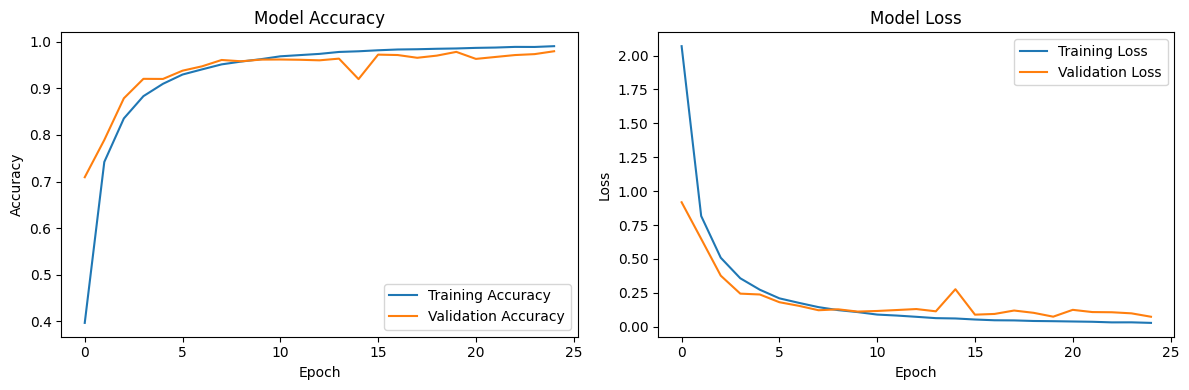

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Save the model
cnn.save('plant_disease_model.keras')
print("Model saved successfully.")

Model saved successfully.


# How images were selected from the folders

In [ ]:
#for x,y in training_set:
 #   print(x,x.shape)
  #  print(y,y.shape)
   # break

tf.Tensor(
[[[[0.39411765 0.39019608 0.37058824]
   [0.38921568 0.3852941  0.36568627]
   [0.39215687 0.3882353  0.36862746]
   ...
   [0.38431373 0.38039216 0.3647059 ]
   [0.37843138 0.3745098  0.35882354]
   [0.37843138 0.3745098  0.35882354]]

  [[0.39509803 0.39117646 0.37156862]
   [0.39215687 0.3882353  0.36862746]
   [0.39607844 0.39215687 0.37254903]
   ...
   [0.39803922 0.39411765 0.37843138]
   [0.3872549  0.38333333 0.36764705]
   [0.38333333 0.37941176 0.36372548]]

  [[0.37843138 0.3745098  0.35490197]
   [0.3745098  0.37058824 0.3509804 ]
   [0.3764706  0.37254903 0.3529412 ]
   ...
   [0.39313725 0.38921568 0.3735294 ]
   [0.38431373 0.38039216 0.3647059 ]
   [0.38431373 0.38039216 0.3647059 ]]

  ...

  [[0.5372549  0.5647059  0.5372549 ]
   [0.5411765  0.5686275  0.5411765 ]
   [0.5411765  0.5686275  0.5411765 ]
   ...
   [0.5117647  0.5392157  0.5117647 ]
   [0.50686276 0.53431374 0.50686276]
   [0.5019608  0.5294118  0.5019608 ]]

  [[0.5372549  0.5647059  0.537254

# :- in batch format

for training set

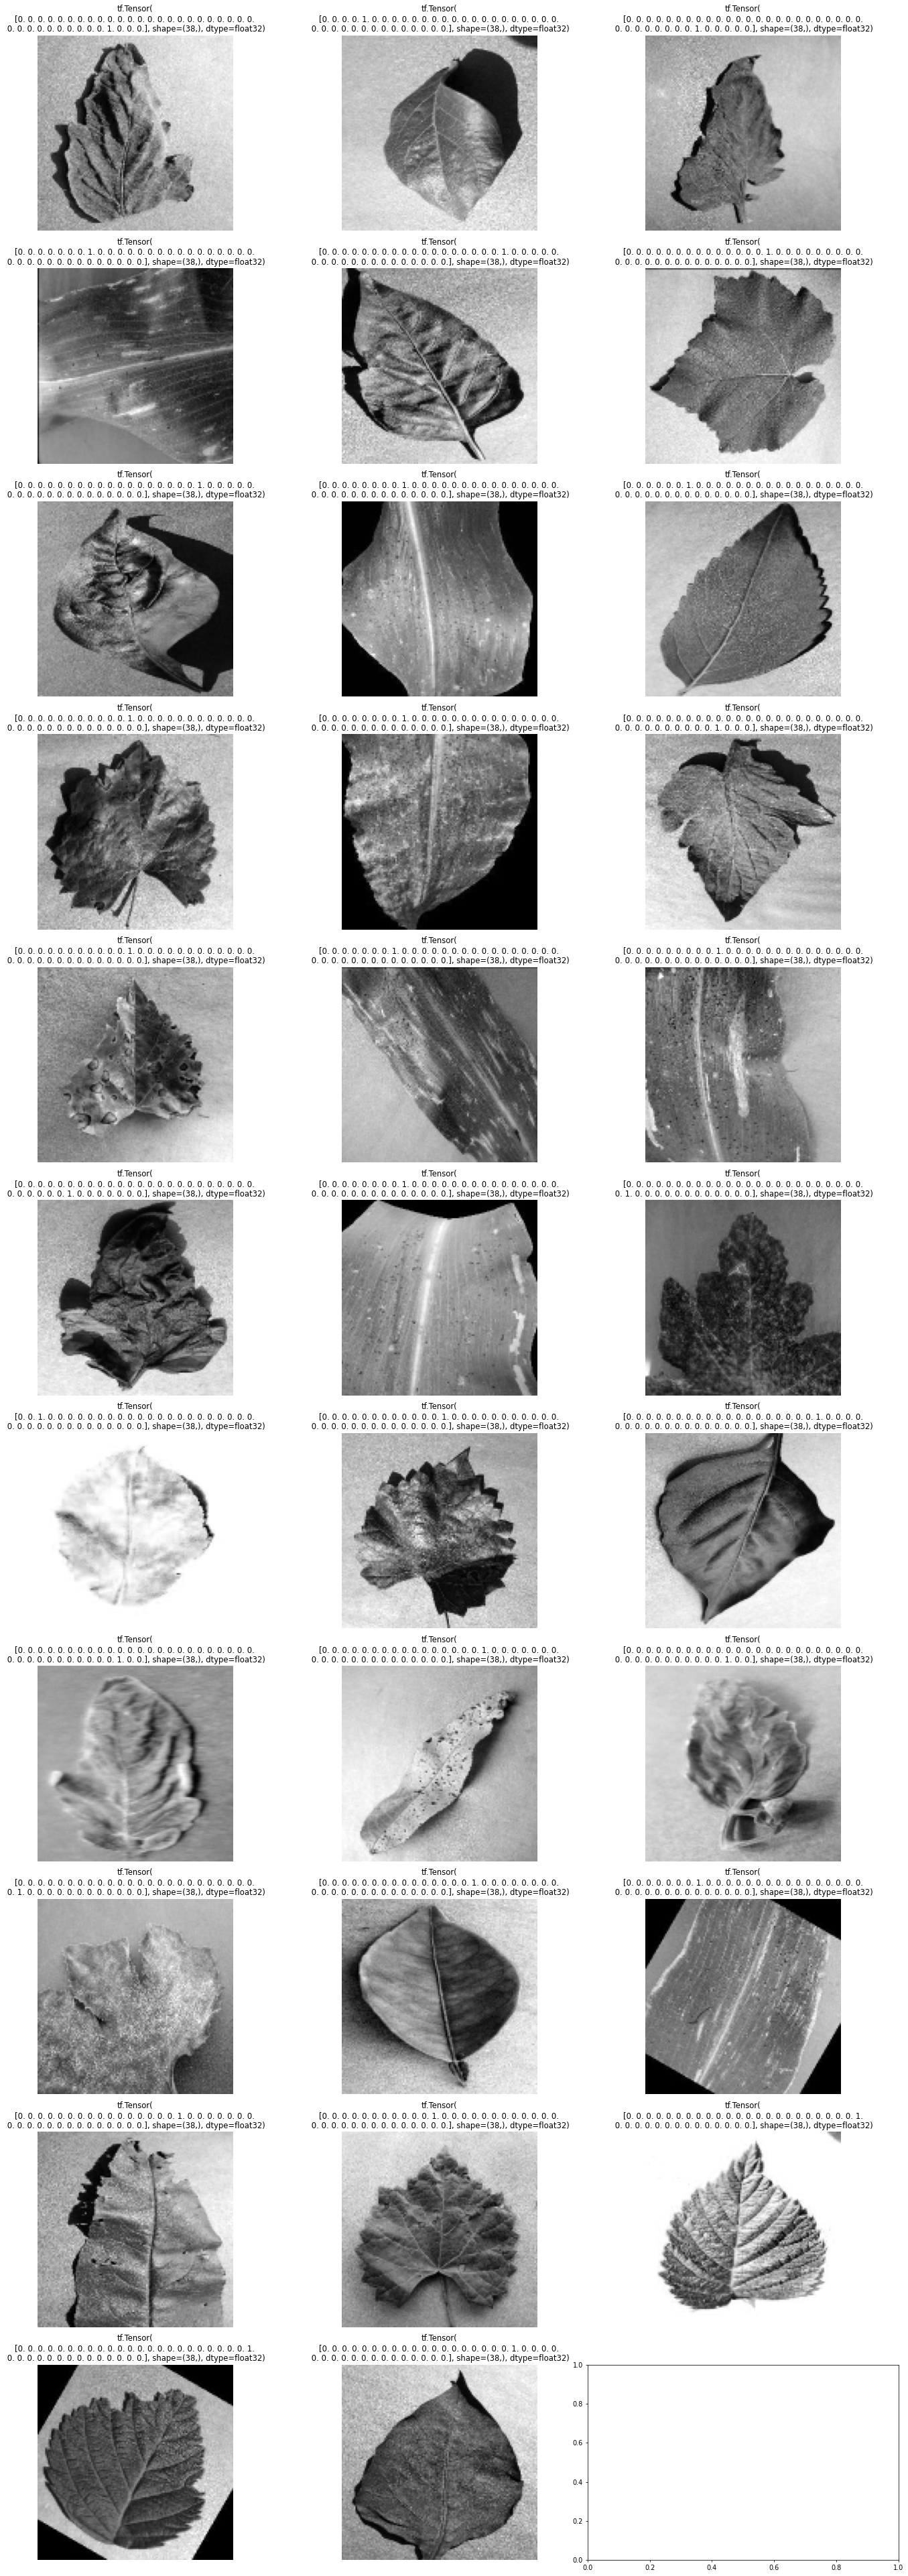

In [ ]:
# Plot the images in the training set
#for x, y in training_set.take(1):  # Take the first batch
    #rows = (x.shape[0] + 2) // 3  # Calculate the number of rows needed
    #fig, axs = plt.subplots(rows, 3, figsize=(20, rows * 5), dpi=70)  # Increased figure width
    #fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Added padding between subplots
    #for i in range(x.shape[0]):
     #   img = x[i]
      #  label = y[i]
       # axs[i // 3, i % 3].imshow(np.mean(img, axis=2), cmap='gray')
        #axs[i // 3, i % 3].set_title(label)
        #axs[i // 3, i % 3].axis('off')
    #plt.tight_layout()
    #plt.show()

for validation set

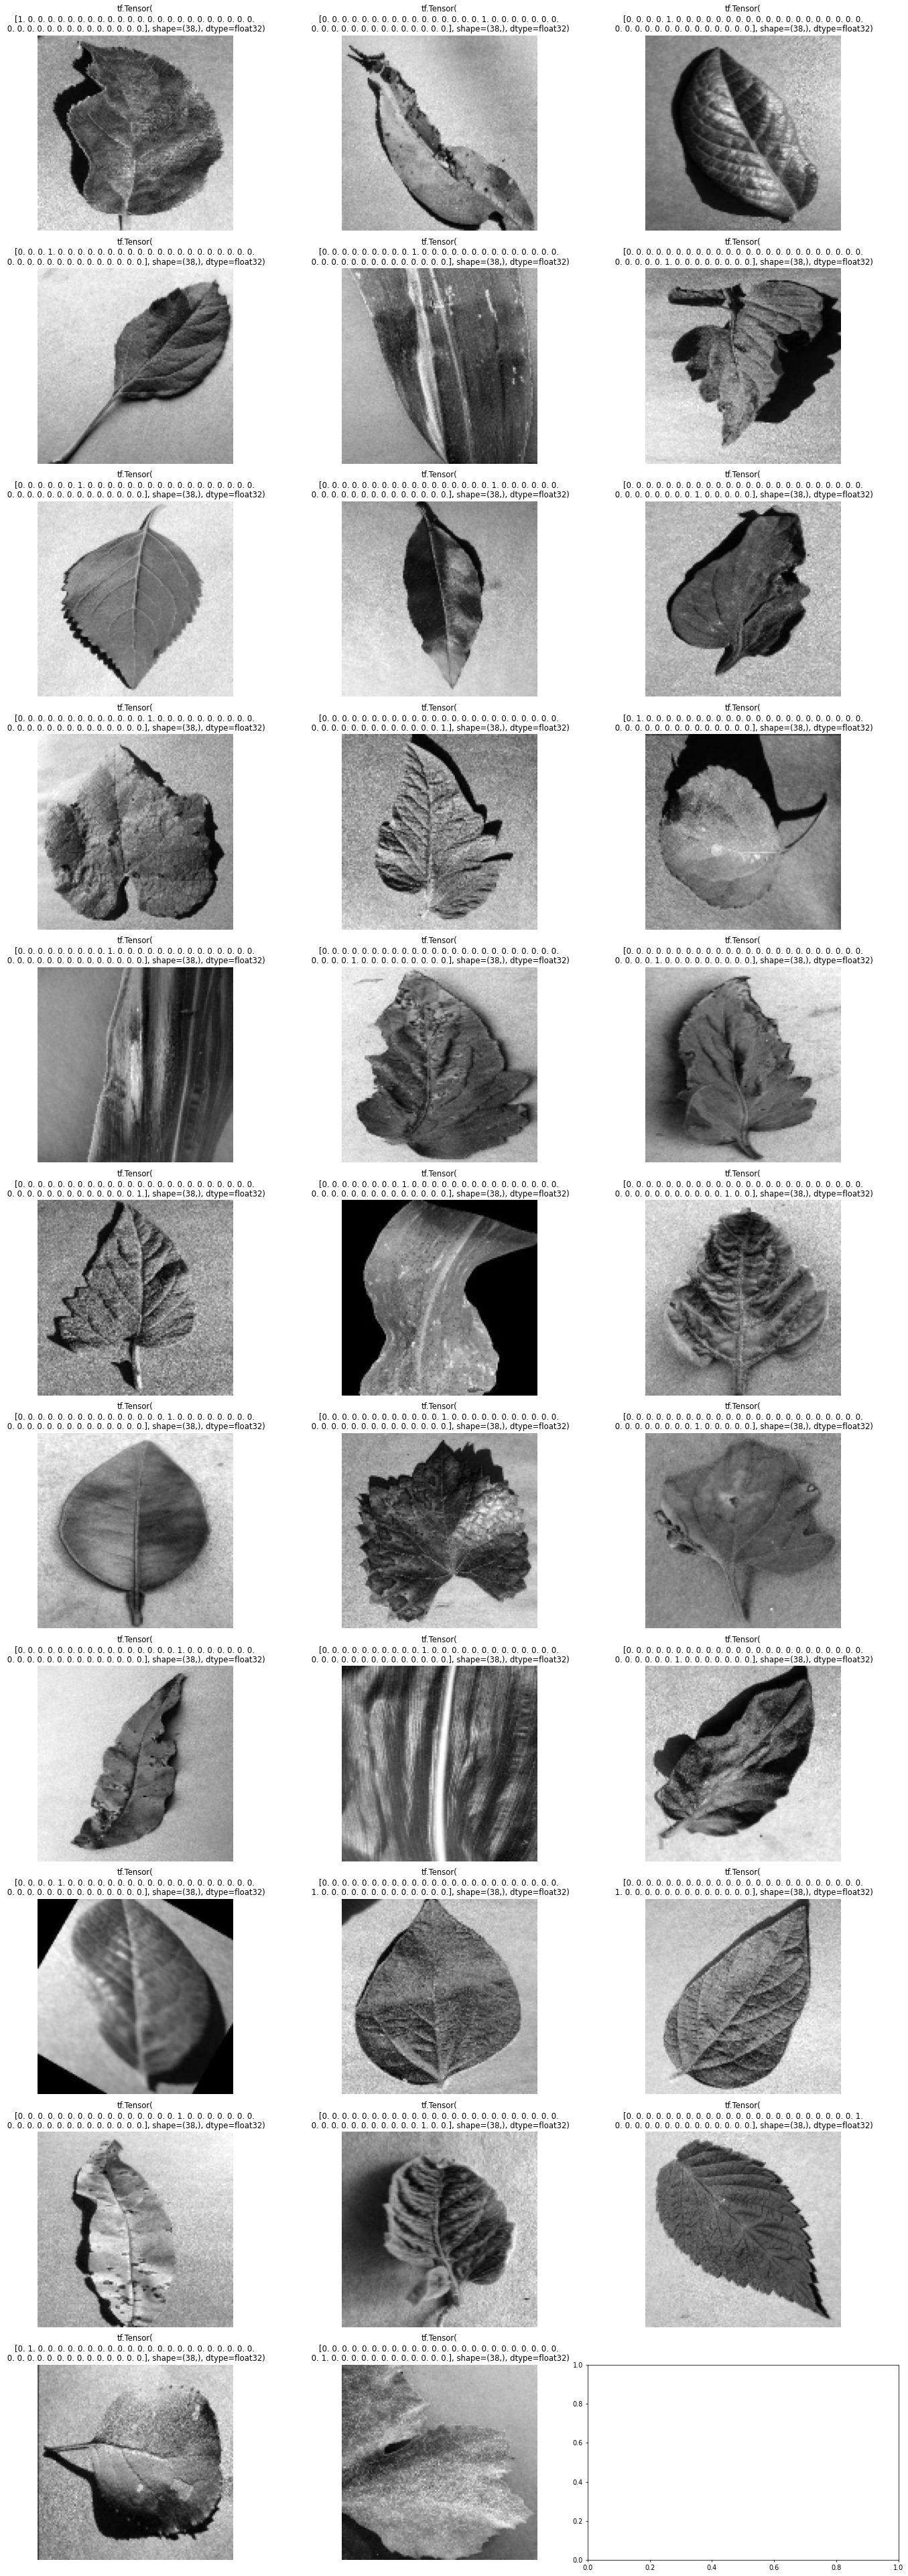

In [ ]:
# Plot the images in the training set
#for x, y in validation_set.take(1):  # Take the first batch
 #   rows = (x.shape[0] + 2) // 3  # Calculate the number of rows needed
  #  fig, axs = plt.subplots(rows, 3, figsize=(20, rows * 5), dpi=70)  # Increased figure width
   # fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Added padding between subplots
    #for i in range(x.shape[0]):
     #   img = x[i]
      #  label = y[i]
       # axs[i // 3, i % 3].imshow(np.mean(img, axis=2), cmap='gray')
        #axs[i // 3, i % 3].set_title(label)
        #axs[i // 3, i % 3].axis('off')
    #plt.tight_layout()
    #plt.show()

Found 70295 files.


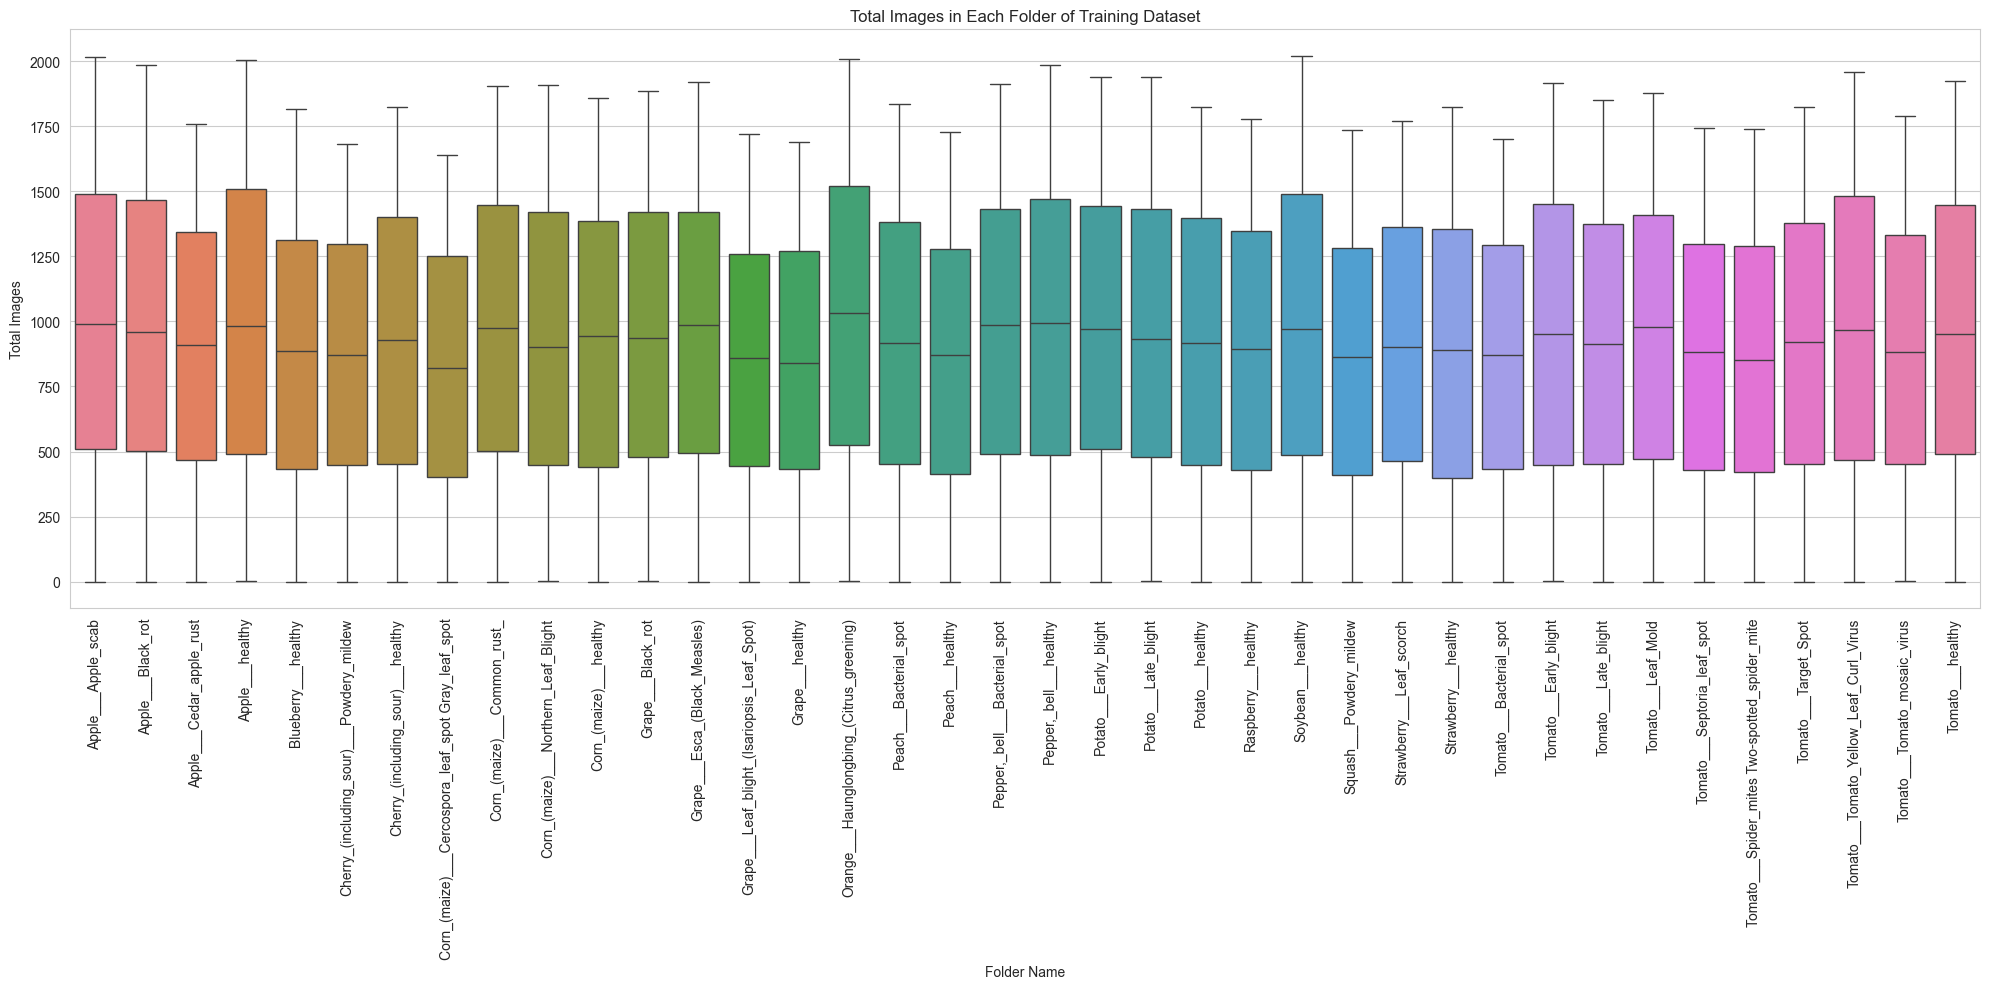

In [ ]:
# Load dataset from directory
dataset_path = "C:/Users/ALOK/Desktop/VT/ML/Plant_disease_detection/train"  # Replace with the path to your dataset
training_set = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    label_mode=None,  # Avoid loading labels, focus only on images
    shuffle=False
)
# Get folder names and counts
folder_names = []
folder_image_counts = []
# Walk through directory to count images in each folder
for folder in sorted(os.listdir(dataset_path)):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        folder_names.append(folder)  # Add folder name
        folder_image_counts.append(len(os.listdir(folder_path)))  # Count images
# Create dictionary with folder names and random image data
images_dict = {
    folder: np.random.randint(0, count, size=count) for folder, count in zip(folder_names, folder_image_counts)
}
# Plot the box plot
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
sns.boxplot(data=list(images_dict.values()))  # Convert dictionary values to a list
plt.xticks(ticks=range(len(folder_names)), labels=folder_names, rotation=90)  # Folder names on x-axis
plt.xlabel('Folder Name')
plt.ylabel('Total Images')
plt.title('Total Images in Each Folder of Training Dataset')
plt.tight_layout()
plt.show()
